### Notebook de Análise de Cogumelos
O objetivo deste modelo de Machine Learning é classificar cogumelos como comestíveis ou venenosos, utilizando suas características como entrada.

### 1- Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## 2- Adquirindo o Conjunto de Dados

A tabela de dados é composta por diversas colunas, onde cada coluna representa uma característica diferente dos cogumelos, como se mostra a seguir:


* Cap Shape
* Cap Surface
* Cap Color
* Bruises
* Odor
* Gill Attachment
* Gill Spacing
* Gill Size
* Gill Color
* Stalk Shape
* Stalk Root
* Stalk Surface Above Ring
* Stalk Surface Below Ring
* Stalk Color Above Ring
* Stalk Color Below Ring
* Veil Type:
* Veil Color
* Ring Number:
* Ring Type
* Spore Print Color
* Population
* Habitat
* Rótulos de Classe: e = comestível, p = venenoso




In [ ]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

dataset = pd.read_csv(dataset_url, names=column_names)

dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 3- Separação do conjunto de treino e teste com holdout
Nessa seção, definimos os tamanhos dos conjuntos de treinamento e teste, as estratégias de partição dos dados e o método que será utilizado para avaliar o desempenho do modelo.

In [ ]:
# Verifica se há valores nulos
print(dataset.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# Transformar colunas categóricas em numéricas (LabelEncoder)
label_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Separar as features (X) e o target (y)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [ ]:
# Definir o tamanho do conjunto de teste e a semente
test_size = 0.20
seed = 7

# Holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Definir o método de validação cruzada estrtificada
particoes = 10
kfold = StratifiedKFold(n_splits=particoes, shuffle=True, random_state=seed)

# Definir a métrica de avaliação
scoring = 'accuracy'

## 4- Modelagem e Inferência
Quatro algoritmos de classificação (KNN, SVM, Naive Bayes e Árvore de Decisão) serão aplicados aos dados, e a acurácia será utilizada como métrica de desempenho.

KNN: 0.998461 (0.001538)
CART: 1.000000 (0.000000)
NB: 0.921834 (0.011134)
SVM: 0.988921 (0.003428)


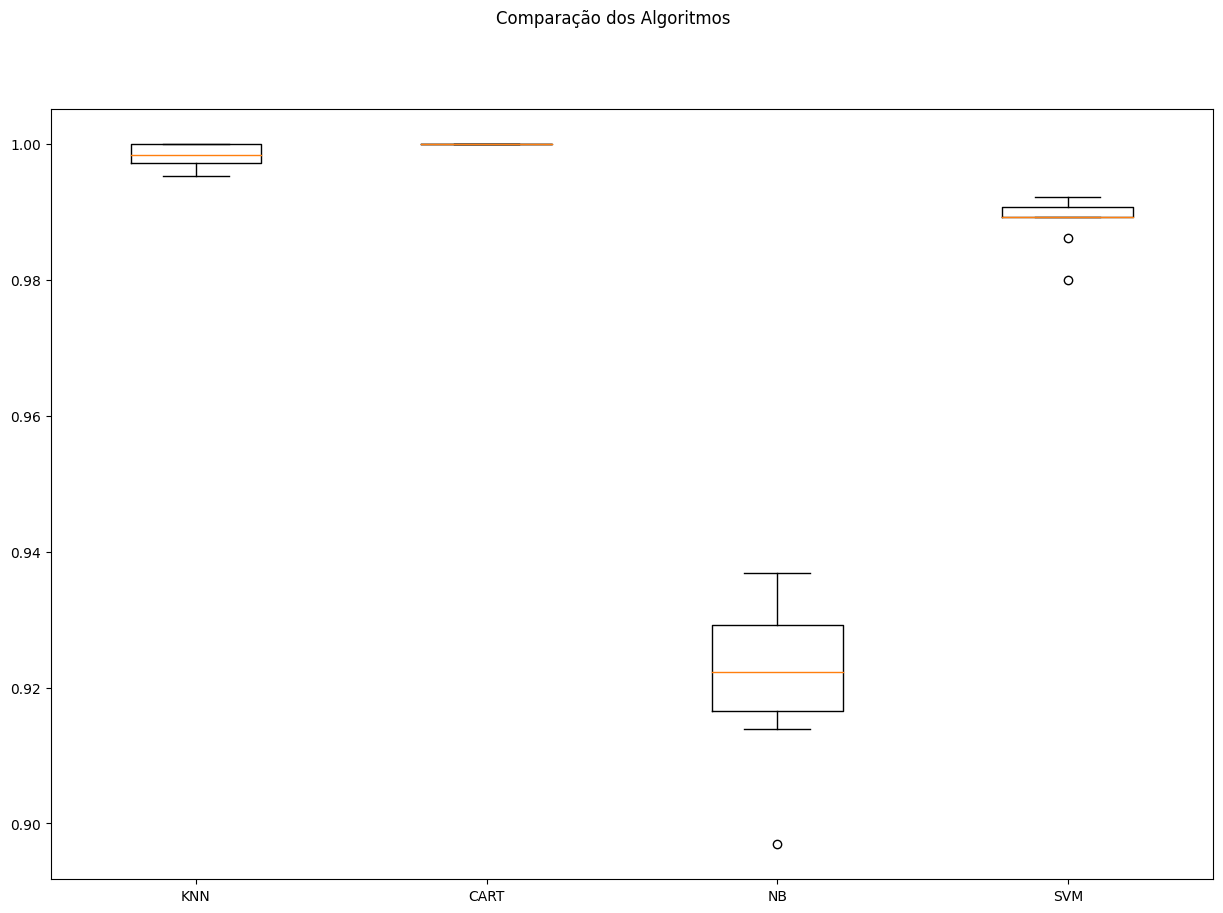

In [ ]:
np.random.seed(7) # Semente global

# Lista para armazenar os modelos
models = []

# Adicionando os modelos à lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de algoritmos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5- Dados padronizados e normalizados

KNN-orig: 0.998 (0.002)
CART-orig: 1.000 (0.000)
NB-orig: 0.922 (0.011)
SVM-orig: 0.989 (0.003)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 0.922 (0.011)
SVM-padr: 1.000 (0.000)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)
NB-norm: 0.922 (0.011)
SVM-norm: 1.000 (0.000)


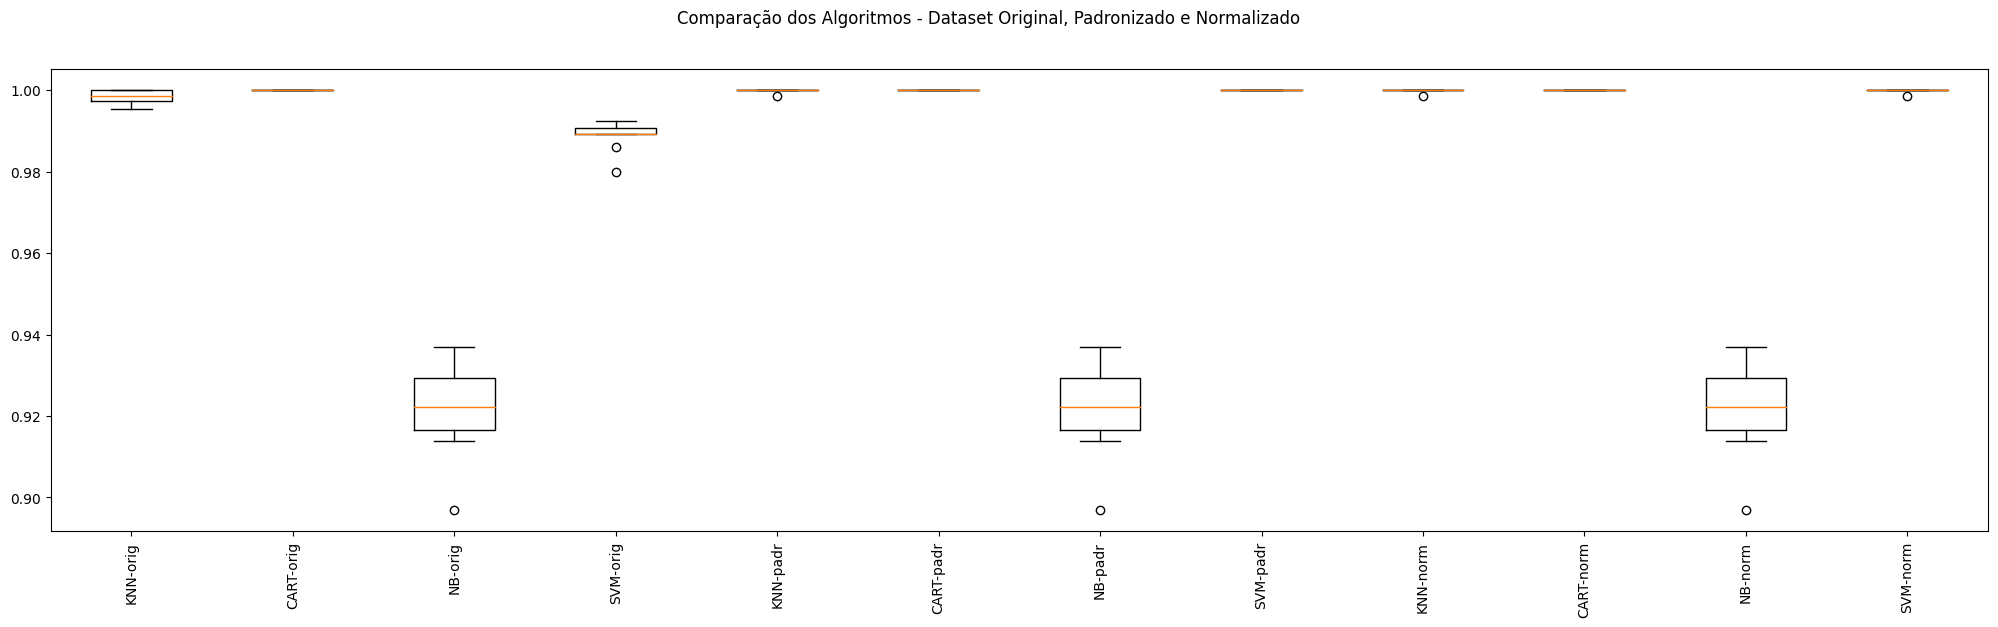

In [ ]:
np.random.seed(7) # Semente global

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original (sem normalização/padronização)
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset padronizado (StandardScaler)
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset normalizado (MinMaxScaler)
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de algoritmos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Algoritmos - Dataset Original, Padronizado e Normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## 6- Otimização dos hiperparâmetros

In [ ]:
# Definir os parâmetros para otimização (grid search)

# Para KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9], # Teste em diferentes números de vizinhos
    'weights': ['uniform', 'distance'], # Peso uniforme ou inverso à distância
    'metric': ['euclidean', 'manhattan'] # Distâncias a serem usadas
}

# Para Decision Tree (Árvore de Decisão)
cart_params = {
    'criterion': ['gini', 'entropy'], # Critério de divisão
    'max_depth': [None, 10, 20, 30, 40, 50], # Profundidade máxima
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4] # Número mínimo de amostras em uma folha
}

# Criar os modelos
knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()

# Otimização de hiperparâmetros com GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=kfold, scoring=scoring, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print(f"Melhores hiperparâmetros para KNN: {grid_search_knn.best_params_}")

# Otimização de hiperparâmetros com GridSearchCV para Decision Tree
grid_search_cart = GridSearchCV(estimator=cart, param_grid=cart_params, cv=kfold, scoring=scoring, n_jobs=-1)
grid_search_cart.fit(X_train, y_train)
best_cart = grid_search_cart.best_estimator_
print(f"Melhores hiperparâmetros para Decision Tree: {grid_search_cart.best_params_}")

# Avaliação do modelo otimizado
best_knn_score = grid_search_knn.score(X_test, y_test)
best_cart_score = grid_search_cart.score(X_test, y_test)

print(f"Acurácia do melhor modelo KNN: {best_knn_score:.3f}")
print(f"Acurácia do melhor modelo Decision Tree: {best_cart_score:.3f}")

Melhores hiperparâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Melhores hiperparâmetros para Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia do melhor modelo KNN: 1.000
Acurácia do melhor modelo Decision Tree: 1.000


## 7- Avaliação do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

categorical_column_index = 0 # Índice da coluna categórica

le = LabelEncoder() # Iniciando o LabelEncoder
all_categories = np.concatenate((X_train.iloc[:, categorical_column_index], X_test.iloc[:, categorical_column_index]))
le.fit(all_categories) # Ajuste em todas as categorias exclusivas

# Transforme os dados de treinamento e teste
X_train.iloc[:, categorical_column_index] = le.transform(X_train.iloc[:, categorical_column_index])
X_test.iloc[:, categorical_column_index] = le.transform(X_test.iloc[:, categorical_column_index])

# Converta a coluna categórica para numérica após a codificação
X_train.iloc[:, categorical_column_index] = X_train.iloc[:, categorical_column_index].astype(float)
X_test.iloc[:, categorical_column_index] = X_test.iloc[:, categorical_column_index].astype(float)

# Padronização dos dados
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Preparação do modelo
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)
model.fit(rescaledX_train, y_train) # Treinamento do modelo

predictions = model.predict(rescaledX_test) # Previsões
accuracy = accuracy_score(y_test, predictions) # Acurácia

print(f"Acurácia do modelo KNN: {accuracy:.3f}")

Acurácia do modelo KNN: 1.000


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_knn, file)